## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import os 

# Study data files
mouse_metadata_path = os.path.join("Resources", "Mouse_metadata.csv")
study_results_path = os.path.join("Resources", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [68]:
# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview

data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [69]:
# Checking the number of mice.

#Unique Mice
data['Mouse ID'].nunique()


249

In [70]:
#Number of total appearance of mice

data['Mouse ID'].count()

1893

In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_tp = data[data.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mice_tp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = data[data.duplicated(['Mouse ID'])]

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [74]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_df = clean_df.groupby("Drug Regimen")
mean = drug_regimen_df[["Tumor Volume (mm3)"]].mean()
median = drug_regimen_df[["Tumor Volume (mm3)"]].median()
std = drug_regimen_df[["Tumor Volume (mm3)"]].std()
sem = drug_regimen_df[["Tumor Volume (mm3)"]].sem()



In [76]:
# Assemble the resulting series into a single summary dataframe.

first_merge = pd.merge(mean, median, on = "Drug Regimen", suffixes = ("_mean", "_median"))
second_merge = pd.merge(std, sem, on = "Drug Regimen", suffixes = ("_std","_sem"))
summary_table = pd.merge(first_merge, second_merge, on = "Drug Regimen")

#Print summary table
summary_table


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_stats = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "std"
                                                                                        , "sem"]})
tumor_volume_stats

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.393463  50.909965  6.568014  0.525862
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook

#Obtaining nr of measurements by Drug Regimen 

nr_measurements = clean_df.groupby("Drug Regimen").agg(count = ("Mouse ID", "count"))

<IPython.core.display.Javascript object>


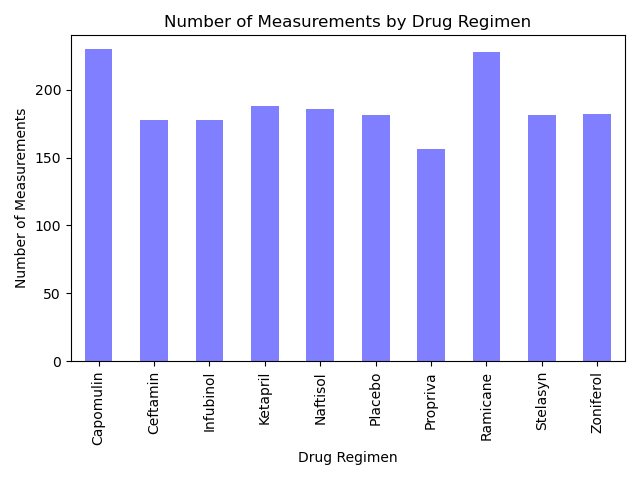

In [83]:
#Plot Bar Chart
nr_measurements.plot(kind ="bar", color = "blue", alpha = 0.5, align="center", legend = False)

#Set a title for the chart
plt.title("Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.ylim(0, max(nr_measurements["count"])+10)
plt.tight_layout()

<IPython.core.display.Javascript object>


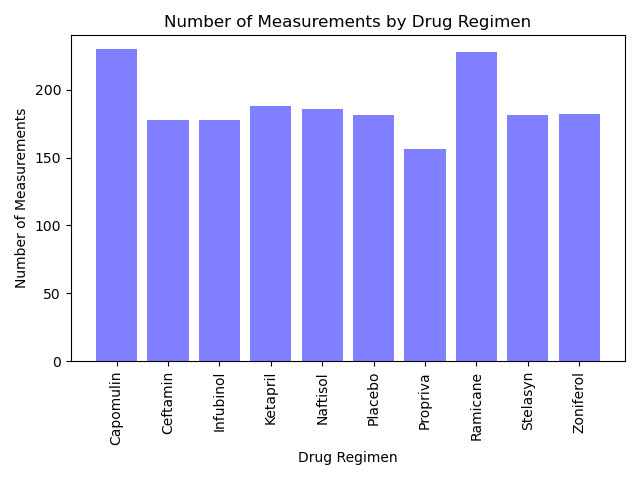

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(nr_measurements.index, nr_measurements["count"], color = "blue", alpha = 0.5, align="center")
plt.xticks(nr_measurements.index, rotation ="vertical")
plt.ylim(0, max(nr_measurements["count"])+10)
plt.title("Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

In [90]:
#Obtaining number of mice by sex

sex_df = clean_df.groupby("Sex").agg(count = ("Mouse ID", "count"))

<IPython.core.display.Javascript object>


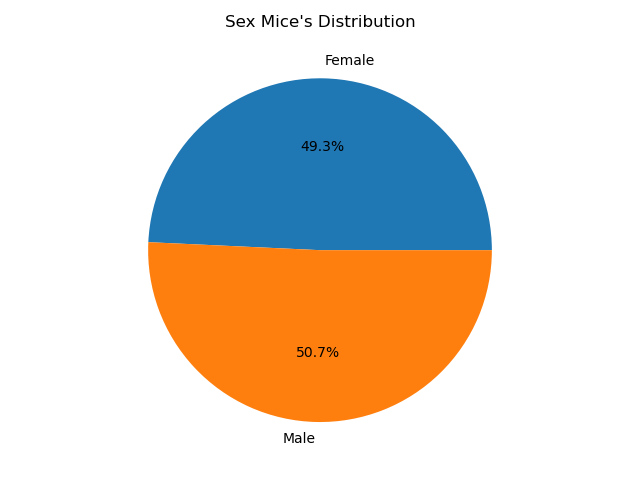

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#sex_df.plot.pie(y="count", figsize = (5,5))
sex_df.plot(kind = "pie", y= "count", legend = False, autopct = "%1.1f%%")
#Set a title for the chart
plt.title("Sex Mice's Distribution")
plt.ylabel("")
plt.tight_layout()

<IPython.core.display.Javascript object>


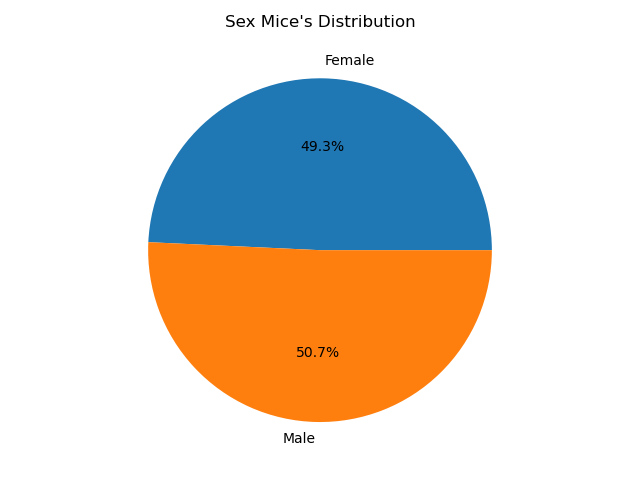

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df.index
plt.pie(sex_df["count"], labels = labels,
       autopct = "%1.1f%%")
#Add title
plt.title("Sex Mice's Distribution")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID").agg(Timepoint = ("Timepoint", "max"))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_volume_lt = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"])

selected_treatments = tumor_volume_lt.loc[(tumor_volume_lt["Drug Regimen"] == "Capomulin") | 
                                          (tumor_volume_lt["Drug Regimen"] == "Ramicane") |
                                          (tumor_volume_lt["Drug Regimen"] == "Infubinol") | 
                                          (tumor_volume_lt["Drug Regimen"] == "Ceftamin"), :]

selected_treatments

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [153]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volumes = selected_treatments["Tumor Volume (mm3)"]

quartiles = tumor_volumes.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


    
# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Tumor volumes below {round(lower_bound,4)} could be outliers.")
print(f"Tumor volumes above {round(upper_bound,4)} could be outliers.")

Tumor volumes below 3.074 could be outliers.
Tumor volumes above 94.044 could be outliers.


<IPython.core.display.Javascript object>


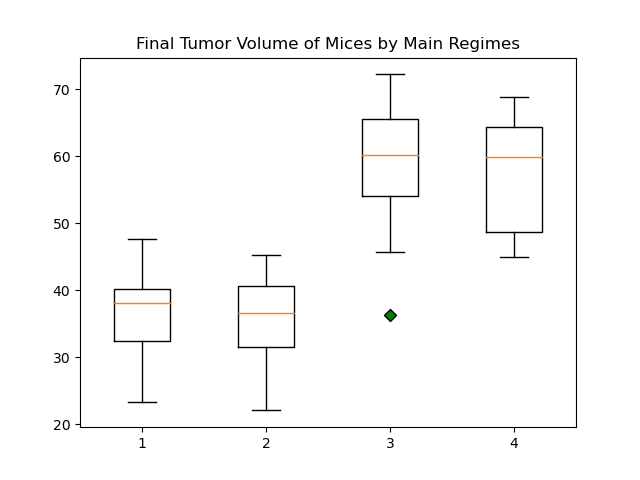

In [157]:

capomulin = tumor_volume_lt.loc[(tumor_volume_lt["Drug Regimen"] == "Capomulin"), :]
ramicane = tumor_volume_lt.loc[(tumor_volume_lt["Drug Regimen"] == "Ramicane"), :]
infubinol = tumor_volume_lt.loc[(tumor_volume_lt["Drug Regimen"] == "Infubinol"),:]
ceftamin = tumor_volume_lt.loc[(tumor_volume_lt["Drug Regimen"] == "Ceftamin"),:]

capomulin_volumes = capomulin["Tumor Volume (mm3)"]
ramicane_volumes = ramicane["Tumor Volume (mm3)"]
infubinol_volumes = infubinol["Tumor Volume (mm3)"]
ceftamin_volumes = ceftamin["Tumor Volume (mm3)"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes]

green = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Mices by Main Regimes")
ax1.boxplot(data, flierprops=green)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


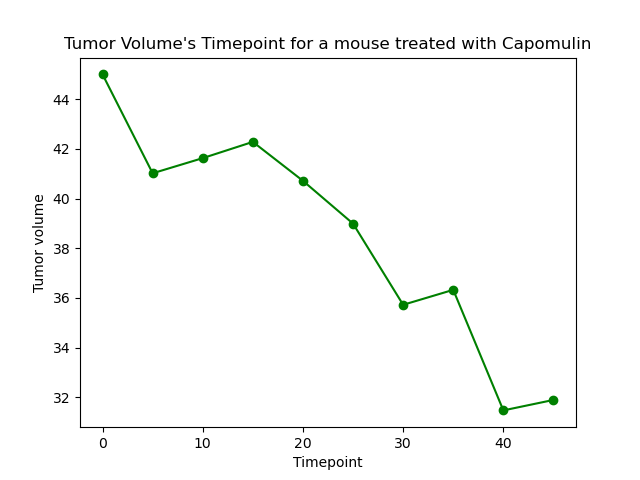

Text(0.5, 0, 'Timepoint')

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

y793_id = clean_df.loc[clean_df["Mouse ID"] == "y793", :]

x_axis = y793_id["Timepoint"]
y_axis = y793_id["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker = 'o', color = "green")
plt.title("Tumor Volume's Timepoint for a mouse treated with Capomulin")
plt.ylabel("Tumor volume")
plt.xlabel("Timepoint")

<IPython.core.display.Javascript object>


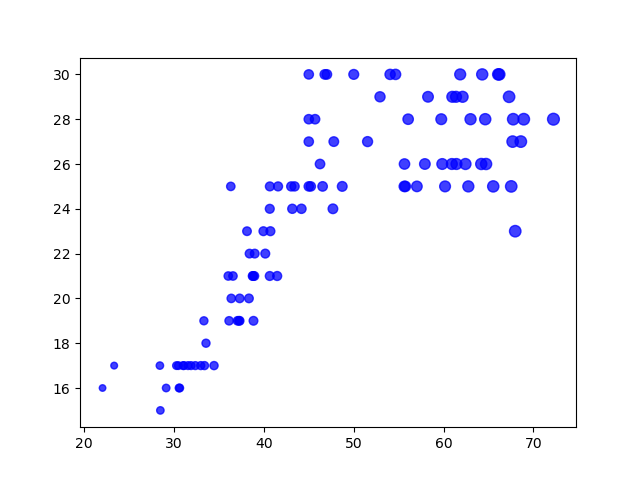

In [158]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = selected_treatments["Tumor Volume (mm3)"]
y_axis = selected_treatments["Weight (g)"]

plt.scatter(x_axis, y_axis, marker = 'o', facecolors ='blue', s=x_axis, alpha = 0.75)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
